In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('Train.csv')

In [3]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
test_df = pd.read_csv('Test.csv')

In [5]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [7]:
test_df['UnitPrice'] = np.nan

In [8]:
train_df['data'] = 'train'
test_df['data'] = 'test'

In [9]:
df = pd.concat([train_df,test_df])
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,train
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,train
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,train
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,train
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,train
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35,train
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35,train
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35,train
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35,train
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35,train


In [11]:
df.shape[0] == train_df.shape[0] + test_df.shape[0]

True

In [12]:
df.drop(['InvoiceNo','InvoiceDate'],axis=1,inplace=True)

In [13]:
df.head(2)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,data
0,1583,144,3,3.75,14056.0,35,train
1,1300,3682,6,1.95,13098.0,35,train


In [14]:
df.isnull().sum()

StockCode           0
Description         0
Quantity            0
UnitPrice      122049
CustomerID          0
Country             0
data                0
dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df.drop(['data'],1))
df.head(2)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,data
0,1583,144,3,3.75,14056.0,35,train
1,1300,3682,6,1.95,13098.0,35,train


In [21]:
df['UnitPrice'] = scaler.fit_transform(df['UnitPrice'].values.reshape(-1,1))

In [22]:
df.UnitPrice.head()

0    0.003811
1   -0.019148
2    0.031872
3   -0.033434
4   -0.022975
Name: UnitPrice, dtype: float64

<AxesSubplot:>

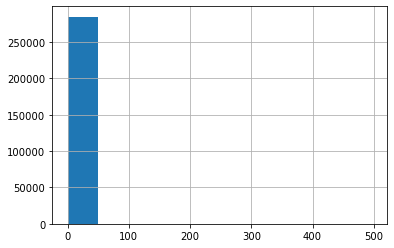

In [23]:
df['UnitPrice'].hist()

In [24]:
df.head(2)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,data
0,1583,144,3,0.003811,14056.0,35,train
1,1300,3682,6,-0.019148,13098.0,35,train


In [25]:
df_train = df[df['data']=='train']
del df_train['data']
df_test = df[df['data']=='test']
df_test.drop(['data','UnitPrice'],1,inplace=True)

C:\Users\yasar\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_train.shape, df_test.shape

((284780, 6), (122049, 5))

In [28]:
df_train.head(1)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1583,144,3,0.003811,14056.0,35


In [29]:
df_test.head(1)

,StockCode,Description,Quantity,CustomerID,Country
0,1709,1079,3,16161.0,35


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_train.drop('UnitPrice',1)
y = df_train['UnitPrice']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
pred_lr = lr.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
r_sq = r2_score(y_test, pred_lr)
MSE = mean_squared_error(y_test, pred_lr)
RMSE = np.sqrt(MSE)
print(r_sq, MSE, RMSE)

0.00024438689991013174 2.831340391156494 1.6826587268832898


In [39]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [40]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [41]:
l1 = lasso.predict(X_test)

In [42]:
r_sq_l1 = r2_score(y_test, l1)
MSE_l1 = mean_squared_error(y_test, l1)
RMSE_l1 = np.sqrt(MSE_l1)
print(r_sq_l1, MSE_l1, RMSE_l1)

0.00022937400823397347 2.8313829081536817 1.6826713607100114
